# **Time Series Analysis Project: Currency Exchange Rates Dinar to Euro**

## 1. Introduction

As a student with interests in the financial analysis, I became intrigued by the complexities of currency exchange rate dynamics. The Algerian Dinar, representing our country's significant economy, offered a fascinating subject for in-depth investigation.

My research aimed to:

1. Systematically analyze the Algerian Dinar to Euro exchange rate
2. Develop a robust methodology for time series analysis in financial contexts
3. Explore the challenges of forecasting exchange rates in a volatile economic environment

For this project, I conducted a time series analysis on currency exchange rates, focusing on the Algerian Dinar to Euro exchange rate. The original dataset contained daily exchange rates from 1995 onward.


## 2. Data Preprocessing


The link to the dataset: https://drive.google.com/file/d/1EI32JPCMIZseDKoWcSm9IxSIh2VkPFtY/view?usp=sharing

In [ ]:
install.packages(c("ggplot2", "zoo", "tseries", "forecast", "dplyr", "knitr", "readr", "lubridate"))

# Load necessary libraries
library(lubridate)
library(ggplot2)
library(zoo)
library(tseries)
library(forecast)
library(dplyr)
library(knitr)
library(readr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




I used R libraries to preprocess the dataset. The key steps included:

- **Reading and sorting the data**: I imported the dataset while parsing the date column correctly and sorted the data chronologically to maintain consistency.
- **Filtering relevant data**: Since the dataset originally started in 1995, I filtered it to only include data from 2013 onward, as this was when the Algerian Dinar data was recorded.
- **Removing unnecessary columns**: I dropped columns corresponding to other currencies, retaining only those relevant to the exchange rate calculation.
- **Handling missing values**: I implemented a function that filled missing values using the average of adjacent values and applied linear interpolation to address gaps.
- **Filtering data into two separate files**:
    - **2013-2015 dataset**: Extracted data from February 1, 2013, to February 1, 2015.
    - **2015-2018 dataset**: Extracted data from February 2, 2015, to February 1, 2018.
- **Saving processed data**: The cleaned datasets were exported as CSV files for further analysis.

The original dataset spans from 1995 onward. When plotting the columns of the data separately, I observed an empty exchange rate DZD until approximately 2012. This flat portion was not representative of actual market behavior but rather an artifact of the missing values present in the dataset. After 2012, the data began to show natural fluctuations, with significant volatility and an upward trend becoming apparent beyond 2013.
To address these issues, I preprocessed the dataset to start from 2013, effectively eliminating the empty exchange rate period. This transformation provided a more accurate representation of the actual exchange rate trends. My preprocessing also included additional cleaning steps to remove inconsistencies and improve data quality for analysis.

The visualization of this preprocessed dataset revealed genuine patterns in the Algerian Dinar to Euro exchange rate, making it more suitable for subsequent time series analysis and forecasting.

,Date,Algerian.Dinar,Australian.Dollar,Bahrain.Dinar,Bolivar.Fuerte,Botswana.Pula,Brazilian.Real,Brunei.Dollar,Canadian.Dollar,Chilean.Peso,⋯,South.African.Rand,Sri.Lanka.Rupee,Swedish.Krona,Swiss.Franc,Thai.Baht,Trinidad.And.Tobago.Dollar,Tunisian.Dinar,U.A.E..Dirham,U.K..Pound.Sterling,U.S..Dollar
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1995-1-2,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
2,1995-1-3,NA,NA,0.376,NA,NA,0.843,NA,1.4035,NA,⋯,3.55,50.04,7.4588,1.3168,25.10,5.8750,NA,3.671,1.5617,1
3,1995-1-4,NA,0.7704,0.376,NA,NA,0.844,NA,1.4026,NA,⋯,3.56,50.07,7.4480,1.3161,25.13,5.8738,NA,3.671,1.5605,1
4,1995-1-5,NA,0.7693,0.376,NA,NA,0.844,NA,1.4002,NA,⋯,3.55,50.07,7.4450,1.3080,25.14,5.8700,NA,3.671,1.5610,1
5,1995-1-6,NA,0.7699,0.376,NA,NA,0.842,NA,1.4002,NA,⋯,3.56,50.07,NA,1.3040,25.13,5.8810,NA,3.671,1.5645,1
6,1995-1-9,NA,0.7658,0.376,NA,NA,0.839,NA,1.4058,NA,⋯,3.55,50.14,7.5231,1.3075,25.15,5.8843,NA,3.671,1.5537,1


Warning message:
“Removed 3988 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 992 rows containing missing values or values outside the scale range
(`geom_line()`).”


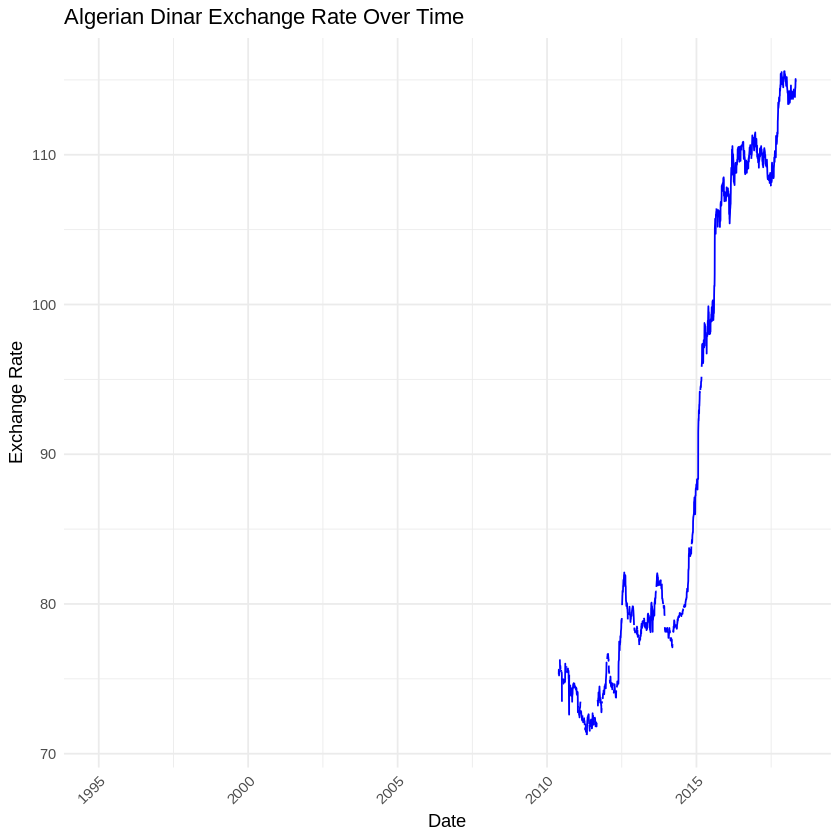

[1] "Preprocessing and plotting complete. Files saved."


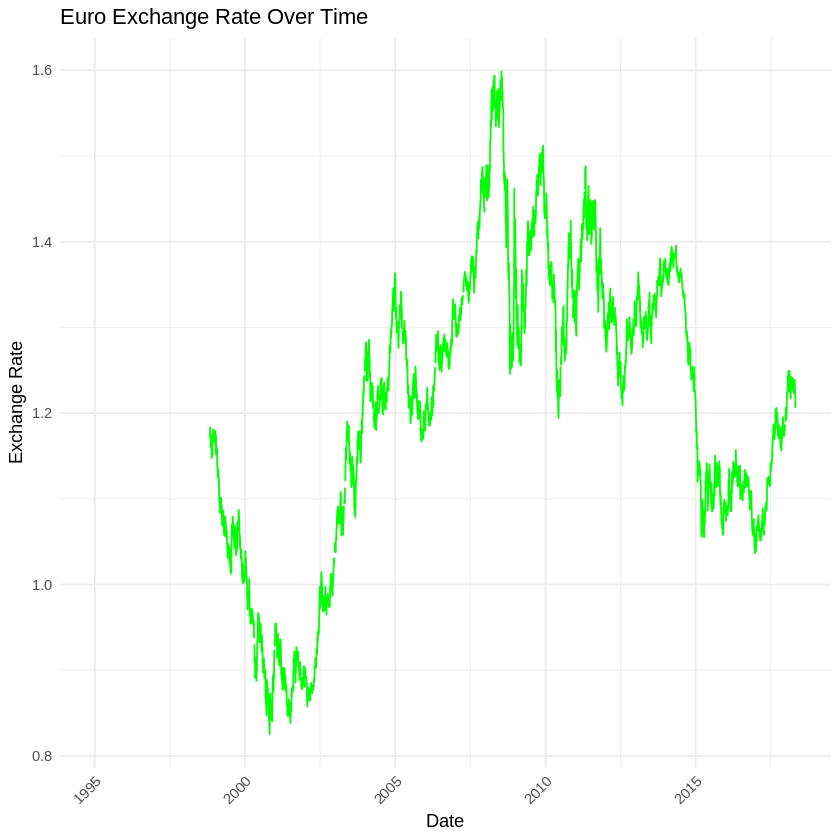

In [ ]:
# Read the CSV file
df <- read.csv("currency_exchange_rates_02-01-1995_-_02-05-2018.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)
head(df)

# Convert Date column to Date format
df$Date <- as.Date(df$Date, format="%Y-%m-%d")

# Keep only the necessary columns
df <- df %>% select(Date, Algerian.Dinar, Euro)

# Convert currency columns to numeric
df$Algerian.Dinar <- as.numeric(gsub(",", "", df$Algerian.Dinar))
df$Euro <- as.numeric(gsub(",", "", df$Euro))

# Plot Algerian Dinar exchange rate over time
ggplot(df, aes(x = Date, y = Algerian.Dinar)) +
  geom_line(color = "blue") +
  labs(title = "Algerian Dinar Exchange Rate Over Time", x = "Date", y = "Exchange Rate") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot Euro exchange rate over time
ggplot(df, aes(x = Date, y = Euro)) +
  geom_line(color = "green") +
  labs(title = "Euro Exchange Rate Over Time", x = "Date", y = "Exchange Rate") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Sort by date
df <- df %>% arrange(Date)

# Function to fill missing values with the mean of adjacent values
fill_missing_values <- function(series) {
  for (i in 2:(length(series) - 1)) {
    if (is.na(series[i])) {
      above <- series[i - 1]
      below <- series[i + 1]
      if (!is.na(above) && !is.na(below)) {
        series[i] <- (above + below) / 2
      }
    }
  }
  return(series)
}

# Apply the function to fill missing values for Algerian Dinar
df$Algerian.Dinar <- fill_missing_values(df$Algerian.Dinar)

# Remove rows where Euro is missing
df <- df %>% filter(!is.na(Euro))

# Define date ranges
start_date_1 <- as.Date("2013-02-01")
end_date_1 <- as.Date("2015-02-01")
start_date_2 <- as.Date("2015-02-02")
end_date_2 <- as.Date("2018-02-01")

# Filter data based on the given ranges
df1 <- df %>% filter(Date > start_date_1 & Date < end_date_1)
df2 <- df %>% filter(Date > start_date_2 & Date < end_date_2)

# Save the cleaned and filtered data
write_csv(df1, "Currency_Exchange_Rate_2013_2015_Train.csv")
write_csv(df2, "Currency_Exchange_Rate_2015_2018_Test.csv")

print("Preprocessing and plotting complete. Files saved.")


## 3. Data Visualization


After preprocessing, I worked to understand the relation between the exchange rate trends and examine stationarity.

### **1. Initial Visualization**

- **Reading the cleaned dataset**: Imported the preprocessed CSV file.
- **Formatting columns**:
    - Converted the `Date` column to a Date format.
    - Removed any commas from numerical values to ensure proper numerical calculations.
- **Computing exchange rates**:
    - Calculated the Dinar per Euro ratio using the formula: Dinar_per_Euro = Algerian Dinar / Euro
    - This calculation provided a direct representation of how the Algerian Dinar changed in relation to the Euro.
- **Plotting the calculated exchange rate**: Used the `ggplot2` library to generate a time series plot of the Algerian Dinar to Euro exchange rate over time, which helped visualize trends and fluctuations.

,Date,Algerian.Dinar,Euro
,<chr>,<dbl>,<dbl>
1,2013-02-04,77.37875,1.3552
2,2013-02-05,77.50180,1.3537
3,2013-02-06,77.53170,1.3517
4,2013-02-07,77.66970,1.3546
5,2013-02-08,77.70710,1.3374
6,2013-02-11,77.78540,1.3391


,Date,Algerian.Dinar,Euro
,<date>,<dbl>,<dbl>
1,2013-02-04,77.37875,1.3552
2,2013-02-05,77.50180,1.3537
3,2013-02-06,77.53170,1.3517
4,2013-02-07,77.66970,1.3546
5,2013-02-08,77.70710,1.3374
6,2013-02-11,77.78540,1.3391


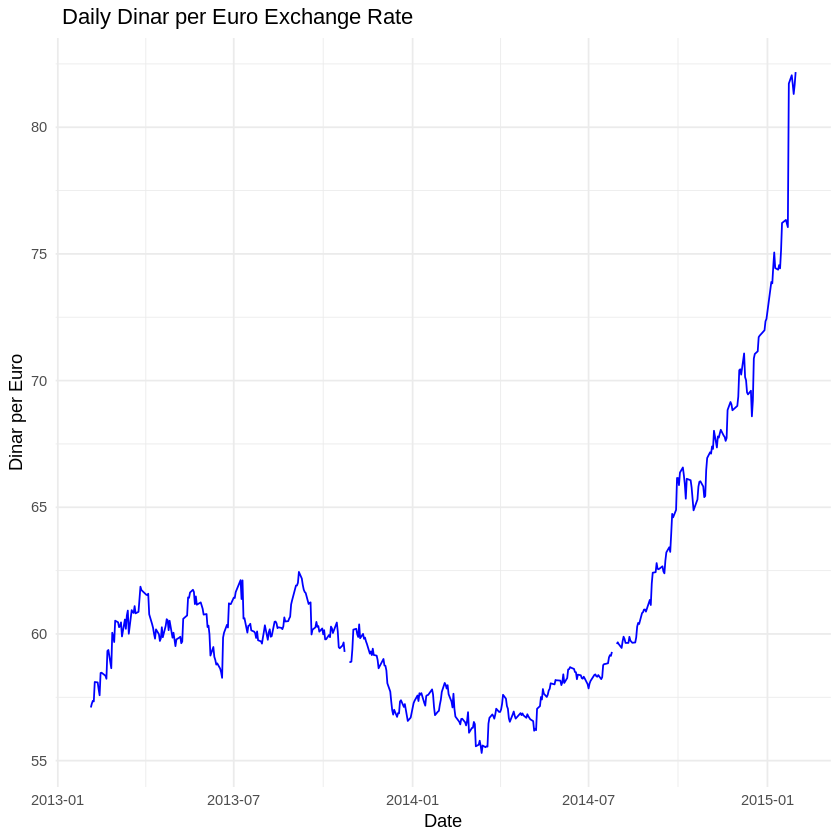

In [ ]:
# Read the CSV file
data <- read.csv("Currency_Exchange_Rate_2013_2015_Train.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)
head(data)

# Convert Date column to Date format
data$Date <- as.Date(data$Date, format="%Y-%m-%d")
head(data)

# Convert currency columns to numeric
data$Algerian.Dinar <- as.numeric(gsub(",", "", data$Algerian.Dinar))
data$Euro <- as.numeric(gsub(",", "", data$Euro))

# Calculate exchange rate
data$Dinar_per_Euro <- data$Algerian.Dinar / data$Euro

# Plot the training exchange rate data
ggplot(data, aes(x=Date, y=Dinar_per_Euro)) +
  geom_line(color="blue") +
  labs(title=" Daily Dinar per Euro Exchange Rate",
       x="Date", y="Dinar per Euro") +
  theme_minimal()

### **2. Smoothing Exchange Rate Data**  

To improve trend analysis and reduce short-term volatility, I aggregated the data on a **weekly basis**. Since exchange rates fluctuate daily due to short-term market movements, external factors, and trading anomalies, weekly aggregation provides a clearer picture of long-term trends.  

The process involved:  

- **Temporal Aggregation**: Converted daily dates into "Year-Week" format using `format(Date, "%Y-%W")`, then computed weekly average exchange rates.  
- **Handling Missing Values**: Applied interpolation techniques to ensure data continuity:  
  - `na.approx()`: Linear interpolation for estimating missing values.  
  - `na.locf()`: Forward and backward filling to maintain data consistency.  

These steps:  
- Reduce noise in the time series.  
- Make long-term trends more interpretable.  
- Smooth out daily irregularities.  
- Prepare data for robust time series modeling.

Week,Date,Dinar_per_Euro
<chr>,<date>,<dbl>
2013-05,2013-02-04,57.42980
2013-06,2013-02-11,58.08253
2013-07,2013-02-19,58.81962
2013-08,2013-02-25,59.76091
2013-09,2013-03-04,60.27797
2013-10,2013-03-11,60.48621


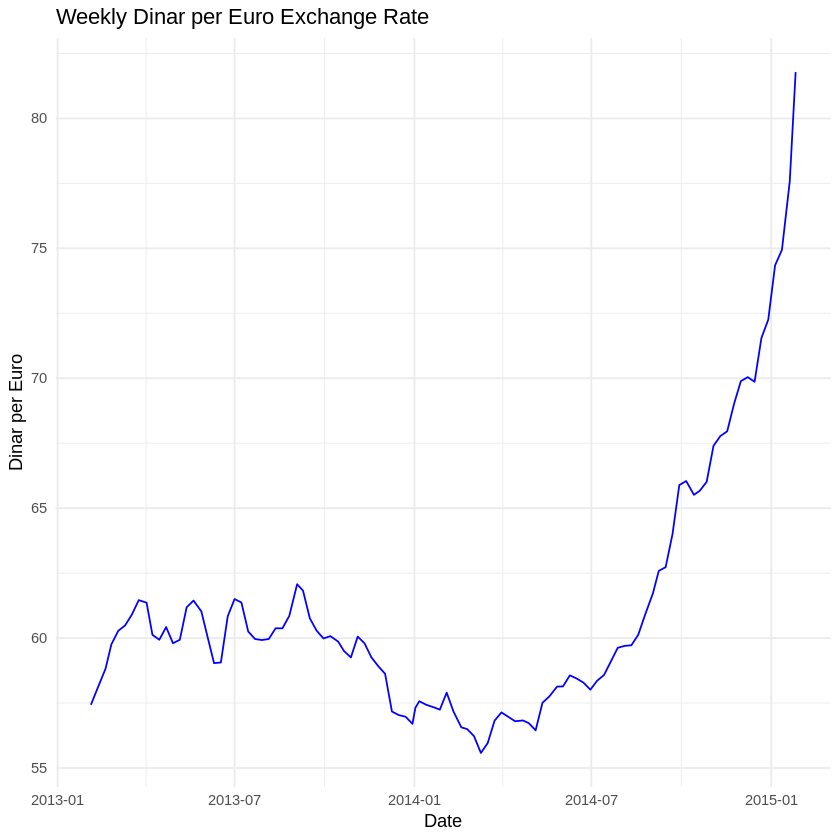

In [ ]:
# Group by week and compute weekly average exchange rate
data_weekly <- data %>%
  group_by(Week = format(Date, "%Y-%W")) %>%
  summarise(Date = min(Date), Dinar_per_Euro = mean(Dinar_per_Euro, na.rm = TRUE)) %>%
  ungroup()

# Handle missing values using interpolation and forward/backward filling
data_weekly$Dinar_per_Euro <- na.approx(data_weekly$Dinar_per_Euro, na.rm=FALSE)
data_weekly$Dinar_per_Euro <- na.locf(data_weekly$Dinar_per_Euro, na.rm=FALSE)
data_weekly$Dinar_per_Euro <- na.locf(data_weekly$Dinar_per_Euro, fromLast=TRUE)
head(data_weekly)

# Convert training data to time series
ts_train <- ts(data_weekly$Dinar_per_Euro, frequency=52,
               start=c(year(min(data_weekly$Date)), as.numeric(format(min(data_weekly$Date), "%W"))))

# Plot the weekly exchange rate data
ggplot(data_weekly, aes(x=Date, y=Dinar_per_Euro)) +
  geom_line(color="blue") +
  labs(title="Weekly Dinar per Euro Exchange Rate",
       x="Date", y="Dinar per Euro") +
  theme_minimal()


### **3. Visualization of Exchange Rates**  

#### Daily vs. Weekly Comparison  

- **Generated line plots** for both **daily** and **weekly** exchange rates.  
- **Visual comparison** demonstrates the **smoothing effect** of weekly aggregation.  
- Highlights the **importance of data preprocessing** in time series analysis.  

#### Significance for Time Series Modeling  

- **Weekly aggregation** reduces noise, making the data more suitable for:  
  - **ARIMA modeling**  
  - **Trend analysis**  
  - **Forecasting**   
- Helps in **selecting appropriate modeling techniques**.  


### **4. STL Decomposition: Trend, Seasonality, and Residuals**

Decomposed the weekly time series into three components using **STL (Seasonal-Trend-Loess):**

1. #### Data (Observed Time Series)
  - Upward trend at the series’ end → **Depreciation of the Algerian Dinar against the Euro**.
  - Fluctuations driven by **market dynamics, policy changes, or external shocks**.

2. #### Seasonal Component
  - Clear **seasonal spikes/dips** recurring at fixed intervals (e.g., annual cycles).
  - Likely tied to **financial cycles, economic policies, or global market trends**.

3. #### Trend Component
  - **Initial decline/stable phase**: Relative Dinar strength or stability.
  - **Sharp upward trajectory**: Sustained Dinar depreciation.

4. #### Remainder (Residual Noise)
  - **Outliers**: Spikes indicate unexplained variations (e.g., economic crises, geopolitical events).
  - **Implications**: Highlights limitations of trend/seasonal models for forecasting extreme events.

### Conclusion from STL Analysis
- **Strong seasonality** and **upward trend** dominate exchange rate dynamics.
- Residuals signal the need for:
  - **Robust error handling** in models.
  - **Incorporating external shock indicators**.


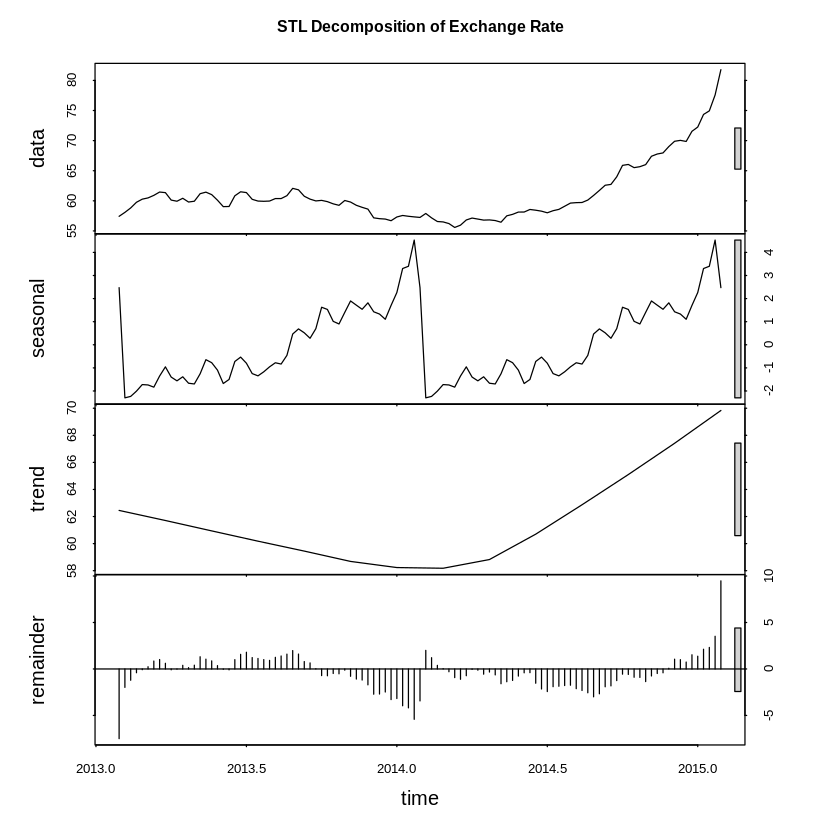

In [ ]:
# Apply STL decomposition
stl_decomp <- stl(ts_train, s.window="periodic")
plot(stl_decomp, main="STL Decomposition of Exchange Rate")

## **4. Stationarity & Autocorrelation Analysis**

To make the data suitable for time series modeling, I applied the Box-Cox transformation to stabilize variance in the Dinar per Euro exchange rate data. I determined the optimal lambda (-0.9999242) using Guerrero's method, which finds the best transformation parameter to reduce heteroscedasticity. Since lambda was close to -1, the transformation was nearly equivalent to taking the reciprocal of the data.

### Interpretation of Box-Cox Results

1. #### **Box-Cox Transformation (λ = -0.9999242)**:
    - The transformation helped stabilize variance, making the fluctuations more uniform over time.
    - Because λ ≈ -1, the transformation closely resembled 1/exchange rate, reducing extreme variations.
2. #### **Box-Cox Transformed Exchange Rate Plot**:
    - The time series still showed trends, suggesting non-stationarity remained an issue.
    - While variance stabilization was achieved, the mean was not constant over time.

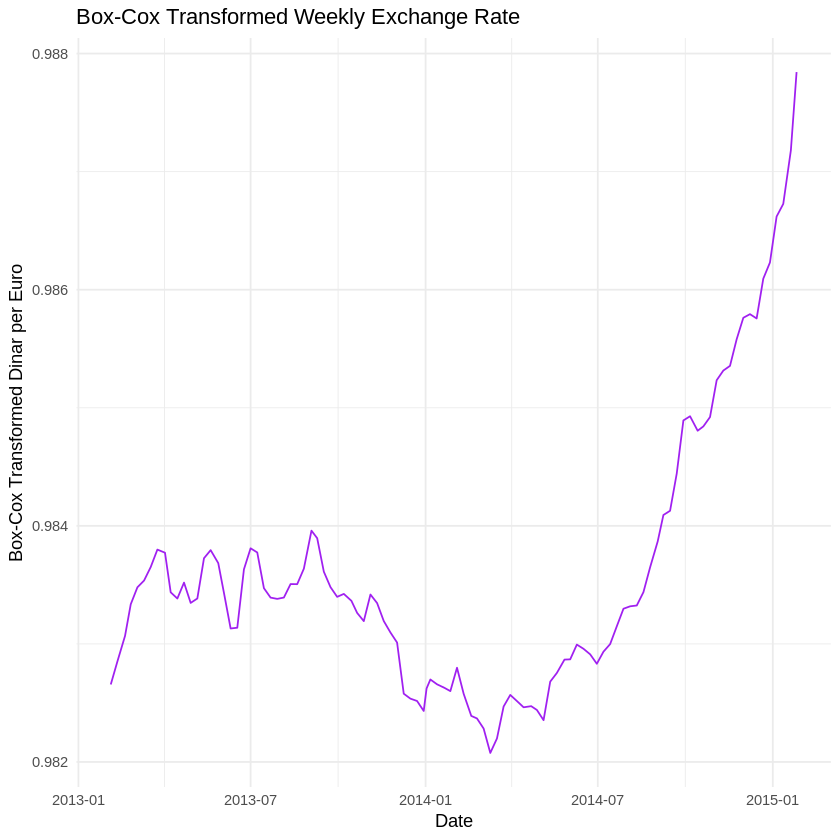

In [ ]:
# Box-Cox transformation to stabilize variance
lambda <- BoxCox.lambda(data_weekly$Dinar_per_Euro, method="guerrero")
data_weekly$boxcox_Dinar_per_Euro <- BoxCox(data_weekly$Dinar_per_Euro, lambda)

# Plot transformed data
ggplot(data_weekly, aes(x=Date, y=boxcox_Dinar_per_Euro)) +
  geom_line(color="purple") +
  labs(title="Box-Cox Transformed Weekly Exchange Rate",
       x="Date", y="Box-Cox Transformed Dinar per Euro") +
  theme_minimal()

### Initial Data Assessment
Before applying differencing techniques, the time series exhibited several key characteristics:

- A pronounced slow decay in autocorrelation values
- Strong evidence of a persistent trend component
- Weak periodic patterns with no significant seasonal spikes
- The Autocorrelation Function (ACF) suggested non-stationarity
- #### ADF Test (Original Data):
  - **Dickey-Fuller statistic**: 2.0269
  - **p-value**: 0.99
  - **Interpretation**: Conclusively non-stationary

**Note**: *I extended the ACF and PACF plots up to 150 lags, to check for seasonality or cyclic patterns in the spikes.*

### Differencing Strategies

- #### First-Order Differencing:
  After applying first-order differencing:
  - The ACF showed a sharp drop-off after lag 1
  - The ADF test results indicated statistical stationarity:
    - **Dickey-Fuller statistic**: -4.0798
    - **p-value**: 0.01
    - **Interpretation**: Statistically stationary

- #### Second-Order Differencing:
  Applying second-order differencing provided more robust stationarity:
  - ACF values rapidly converged towards zero
  - Most autocorrelation values fell within confidence intervals
  - ADF test results were extremely strong
    - **Dickey-Fuller statistic**: -7.3333
    - **p-value**: 0.01
    - **Interpretation**: Highly stationary


### Autocorrelation and Model Selection Insights
1. #### Autocorrelation Function (ACF) Characteristics (After Differencing)

  - Sharp drop-off after initial lags
  - No significant long-term autocorrelations
  - Minimal evidence of strong seasonal effects
  - Most values beyond lag 40 resemble white noise

2. #### Partial Autocorrelation Function (PACF) Observations (After Differencing)

  - Significant spike at lag 1 suggests an AR(1) process might be appropriate
  - Minor cyclical behavior indicated by spikes at lags 19 and 39
  - Higher-order lags contribute minimally to autocorrelation

**Note**: *I extended the ACF and PACF plots up to 52 lags, to check for seasonality or cyclic patterns in the spikes.*


Warning message in adf.test(data_weekly$boxcox_Dinar_per_Euro):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  data_weekly$boxcox_Dinar_per_Euro
Dickey-Fuller = 2.0586, Lag order = 4, p-value = 0.99
alternative hypothesis: stationary



Warning message in adf.test(na.omit(data_weekly$diff_boxcox_Dinar_per_Euro)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(data_weekly$diff_boxcox_Dinar_per_Euro)
Dickey-Fuller = -4.1448, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



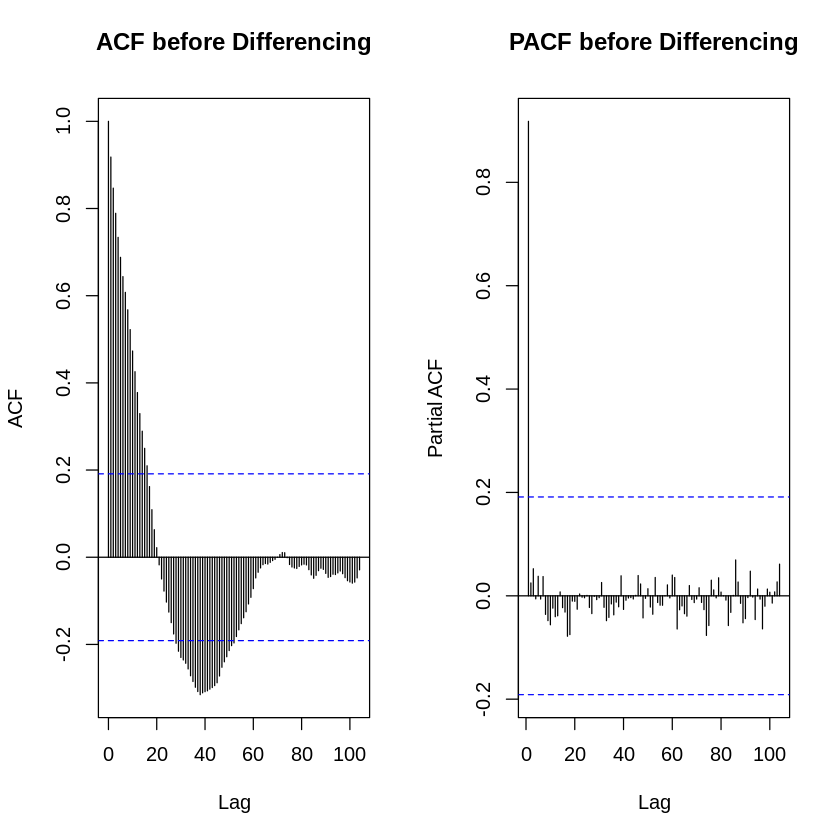

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


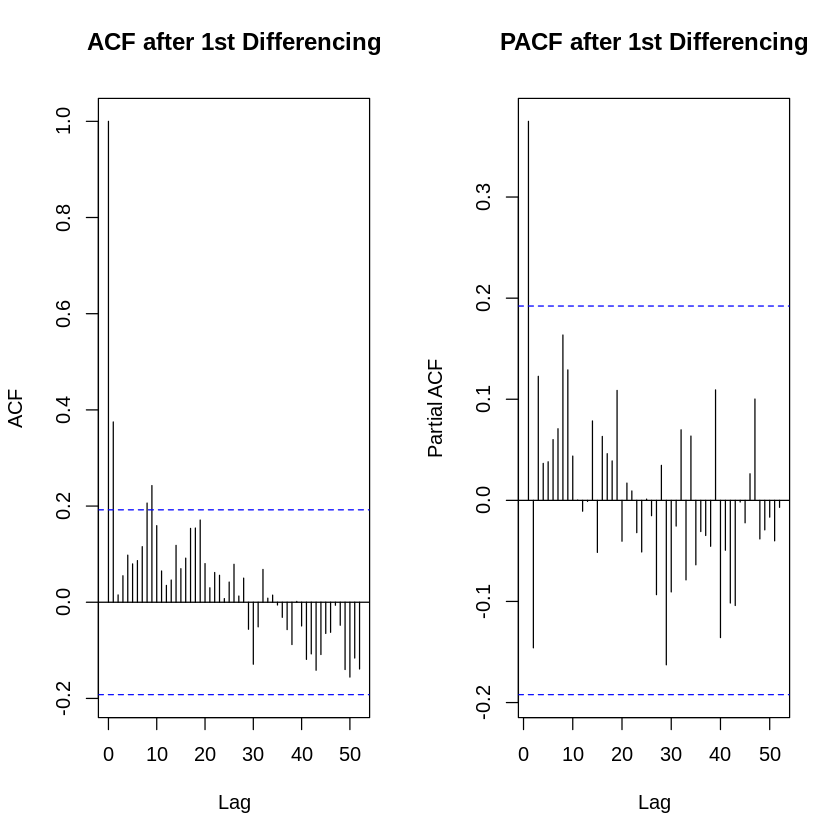

Warning message in adf.test(na.omit(data_weekly$diff2_boxcox_Dinar_per_Euro)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(data_weekly$diff2_boxcox_Dinar_per_Euro)
Dickey-Fuller = -7.5597, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


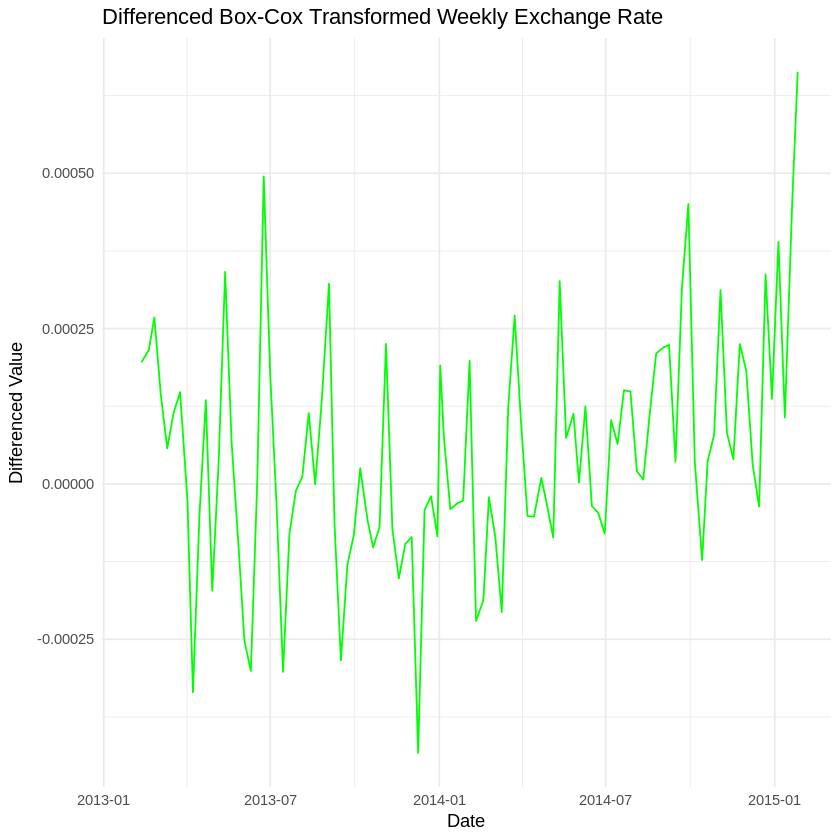

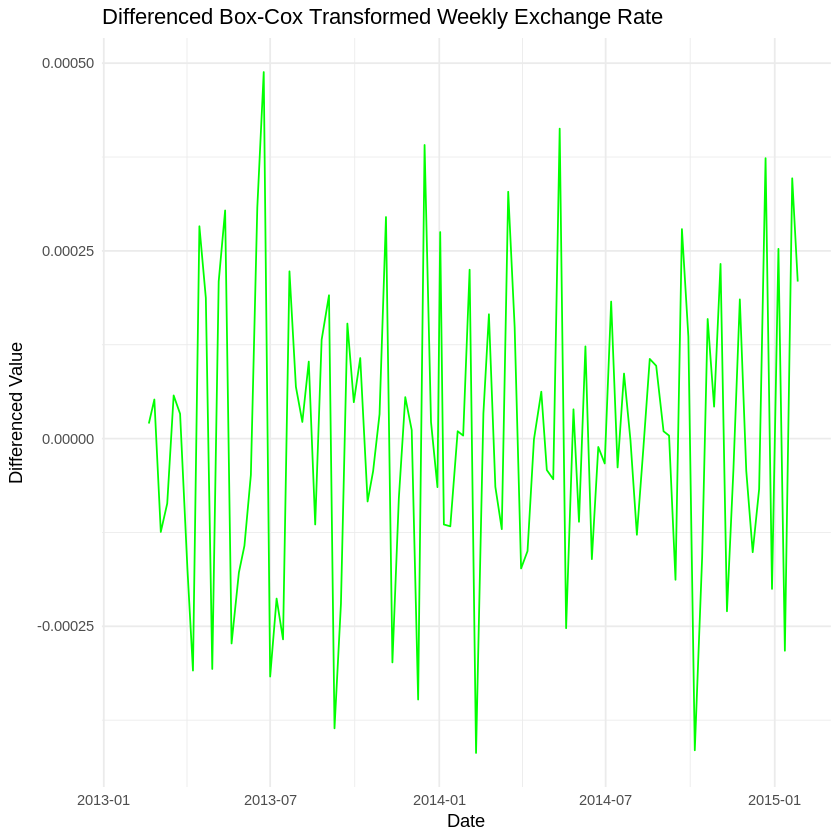

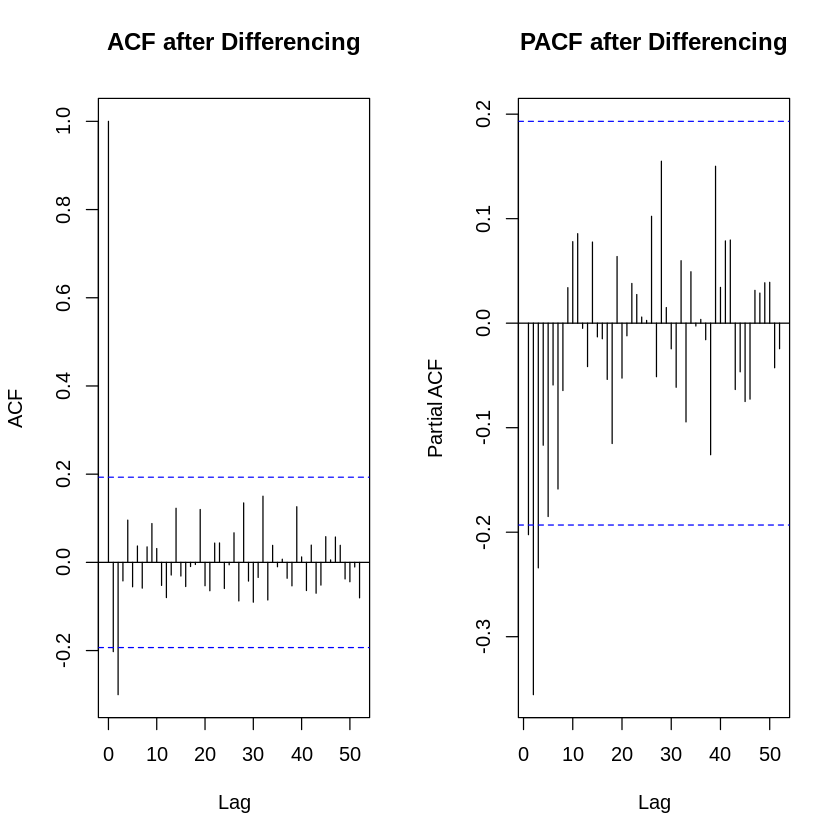

In [ ]:
# ACF and PACF before differencing
par(mfrow=c(1,2))
acf(na.omit(data_weekly$boxcox_Dinar_per_Euro), lag.max = 150, main="ACF before Differencing")
pacf(na.omit(data_weekly$boxcox_Dinar_per_Euro), lag.max = 150, main="PACF before Differencing")
par(mfrow=c(1,1))

# ADF test for stationarity (before differencing)
adf_before <- adf.test(data_weekly$boxcox_Dinar_per_Euro)
print(adf_before)

# Differencing to remove trend
data_weekly$diff_boxcox_Dinar_per_Euro <- c(NA, diff(data_weekly$boxcox_Dinar_per_Euro, differences=1))

# ADF test after first differencing
adf_first_diff <- adf.test(na.omit(data_weekly$diff_boxcox_Dinar_per_Euro))
print(adf_first_diff)

par(mfrow=c(1,2))
acf(na.omit(data_weekly$diff_boxcox_Dinar_per_Euro), lag.max = 52, main="ACF after 1st Differencing")
pacf(na.omit(data_weekly$diff_boxcox_Dinar_per_Euro), lag.max = 52, main="PACF after 1st Differencing")
par(mfrow=c(1,1))

# Plot differenced data
ggplot(data_weekly, aes(x=Date, y=diff_boxcox_Dinar_per_Euro)) +
  geom_line(color="green") +
  labs(title="Differenced Box-Cox Transformed Weekly Exchange Rate",
       x="Date", y="Differenced Value") +
  theme_minimal()

# Differencing to remove further trend
data_weekly$diff2_boxcox_Dinar_per_Euro <- c(NA, diff(data_weekly$diff_boxcox_Dinar_per_Euro, differences=1))

# ADF test after second differencing
adf_second_diff <- adf.test(na.omit(data_weekly$diff2_boxcox_Dinar_per_Euro))
print(adf_second_diff)

# Plot differenced data
ggplot(data_weekly, aes(x=Date, y=diff2_boxcox_Dinar_per_Euro)) +
  geom_line(color="green") +
  labs(title="Differenced Box-Cox Transformed Weekly Exchange Rate",
       x="Date", y="Differenced Value") +
  theme_minimal()

# ACF and PACF after differencing
par(mfrow=c(1,2))
acf(na.omit(data_weekly$diff2_boxcox_Dinar_per_Euro), lag.max = 52, main="ACF after Differencing")
pacf(na.omit(data_weekly$diff2_boxcox_Dinar_per_Euro), lag.max = 52, main="PACF after Differencing")
par(mfrow=c(1,1))

## **5. Model Diagnosis**

I conducted an extensive model selection process to identify the most appropriate ARIMA configuration for our exchange rate time series. The initial approach involved manual model selection based on Autocorrelation Function **(ACF)** and Partial Autocorrelation Function **(PACF)** analysis, then I resorted to the use of a predefined function `(auto.arima)` to test for ARIMA and SARIMA models

1. #### Manual Model Selection
  - Best Model: ARIMA(2,2,2)
  - AIC: -1477.810
  - BIC: -1464.685

2. #### Automated (Auto ARIMA) Selection
  - Best Model: ARIMA(0,2,2)
  - AIC: -1496.172
  - BIC: -1488.51

3. #### Seasonal ARIMA (SARIMA) Exploration
  - Best Model: ARIMA(0,2,2)
  - AIC: -1496.172
  - BIC: -1488.51

  Confirmed no significant seasonality in the data

In [ ]:
# Fit multiple ARIMA models
model1 <- arima(data_weekly$diff2_boxcox_Dinar_per_Euro, order=c(1,0,1))
model2 <- arima(data_weekly$diff2_boxcox_Dinar_per_Euro, order=c(1,0,0))
model3 <- arima(data_weekly$diff2_boxcox_Dinar_per_Euro, order=c(0,0,1))
model4 <- arima(data_weekly$diff2_boxcox_Dinar_per_Euro, order=c(2,0,2))

# Compare AIC and BIC
models <- list(model1, model2, model3, model4)
model_names <- c("ARIMA(1,2,1)", "ARIMA(1,2,0)",
                 "ARIMA(0,2,1)", "ARIMA(2,2,2)")
aic_values <- sapply(models, AIC)
bic_values <- sapply(models, BIC)

comparison <- data.frame(Model=model_names, AIC=aic_values, BIC=bic_values)
print(comparison)

# Select best model based on AIC
comp_model_idx <- which.min(aic_values)
comp_model <- models[[comp_model_idx]]
cat("Best model based on AIC:", model_names[comp_model_idx], "\n")

# Comprehensive diagnostics for best model
summary(comp_model)

# Auto ARIMA model
model_auto <- auto.arima(data_weekly$boxcox_Dinar_per_Euro, d=2, seasonal=FALSE, trace=TRUE)
summary(model_auto)

# SARIMA model
model_sarima <- auto.arima(data_weekly$boxcox_Dinar_per_Euro, d=2, seasonal=TRUE, trace=TRUE)
summary(model_sarima)

         Model       AIC       BIC
1 ARIMA(1,2,1) -1491.170 -1480.631
2 ARIMA(1,2,0) -1464.350 -1456.446
3 ARIMA(0,2,1) -1485.259 -1477.355
4 ARIMA(2,2,2) -1493.428 -1477.620
Best model based on AIC: ARIMA(2,2,2) 



Call:
arima(x = data_weekly$diff2_boxcox_Dinar_per_Euro, order = c(2, 0, 2))

Coefficients:
         ar1      ar2      ma1     ma2  intercept
      0.4179  -0.2913  -0.9878  0.0901      0e+00
s.e.  0.8029   0.3171   0.8898  0.8294      2e-04

sigma^2 estimated as 2.589e-08:  log likelihood = 752.71,  aic = -1493.43

Training set error measures:
                        ME         RMSE          MAE      MPE    MAPE      MASE
Training set -6.679559e-06 0.0001608884 0.0001235622 72.55184 182.106 0.5227055
                      ACF1
Training set -0.0007850869


 ARIMA(2,2,2)                    : -1494.083
 ARIMA(0,2,0)                    : -1463.944
 ARIMA(1,2,0)                    : -1466.161
 ARIMA(0,2,1)                    : -1486.528
 ARIMA(1,2,2)                    : -1494.235
 ARIMA(0,2,2)                    : -1496.172
 ARIMA(0,2,3)                    : -1494.47
 ARIMA(1,2,1)                    : -1492.066
 ARIMA(1,2,3)                    : Inf

 Best model: ARIMA(0,2,2)                    



Series: data_weekly$boxcox_Dinar_per_Euro 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.5177  -0.3602
s.e.   0.0927   0.0898

sigma^2 = 4.637e-08:  log likelihood = 751.21
AIC=-1496.41   AICc=-1496.17   BIC=-1488.51

Training set error measures:
                        ME         RMSE          MAE           MPE       MAPE
Training set -2.010667e-06 0.0002111946 0.0001384604 -0.0002085537 0.01407472
                 MASE       ACF1
Training set 0.971023 -0.1424601


 ARIMA(2,2,2)                    : -1494.083
 ARIMA(0,2,0)                    : -1463.944
 ARIMA(1,2,0)                    : -1466.161
 ARIMA(0,2,1)                    : -1486.528
 ARIMA(1,2,2)                    : -1494.235
 ARIMA(0,2,2)                    : -1496.172
 ARIMA(0,2,3)                    : -1494.47
 ARIMA(1,2,1)                    : -1492.066
 ARIMA(1,2,3)                    : Inf

 Best model: ARIMA(0,2,2)                    



Series: data_weekly$boxcox_Dinar_per_Euro 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.5177  -0.3602
s.e.   0.0927   0.0898

sigma^2 = 4.637e-08:  log likelihood = 751.21
AIC=-1496.41   AICc=-1496.17   BIC=-1488.51

Training set error measures:
                        ME         RMSE          MAE           MPE       MAPE
Training set -2.010667e-06 0.0002111946 0.0001384604 -0.0002085537 0.01407472
                 MASE       ACF1
Training set 0.971023 -0.1424601

## **6. Model Evaluation and Residual Analysis**

I conducted a comprehensive diagnostic analysis of two ARIMA model specifications: a manually specified **ARIMA(2,2,2)** and an automatically selected **ARIMA(0,2,2)** model. The objective was to rigorously evaluate the statistical properties and underlying assumptions of each model specification.

### Diagnostic Test Results

#### Formal Statistical Tests

1. **Shapiro-Wilk Normality Test**  
   - **ARIMA(2,2,2)**: W statistic of **0.98134** with a p-value of **0.1506** indicated **normally distributed residuals**.  
   - **ARIMA(0,2,2)**: W statistic of **0.84257** with a p-value of **3.404e-09** suggested **significant deviations from normality**.

2. **Runs Test for Randomness**  
   - **ARIMA(2,2,2)**: Standard Normal statistic of **-0.7848** (p-value: **0.4326**)  
   - **ARIMA(0,2,2)**: Standard Normal statistic of **0.8084** (p-value: **0.4189**)  
   Both models demonstrated **potential randomness** in residual structure.

3. **Ljung-Box Test for Autocorrelation**  
   - **ARIMA(2,2,2)**: X-squared statistic of **0.36384** (p-value: **0.9939**)  
   - **ARIMA(0,2,2)**: X-squared statistic of **2.9554** (p-value: **0.6615**)  
   Neither model exhibited **significant autocorrelation** in residuals.












### Residual Analysis

1. #### ARIMA(2,2,2) Model Residual Diagnostics

  1. #### **Residual Time Series Plot**
    - Fluctuations centered around **zero**, indicating **no apparent systematic pattern**.
    - Overall structure suggested **effective model fit**, though subtle variations hinted at **potential heteroscedasticity**.

  2. #### **Residuals Histogram**
    - Distribution approximated a **normal bell curve**, with **minor deviations** in the tails.
    - Density curve suggested **slight skewness**, though the overall shape remained **consistent with normality assumptions**.

  3. #### **Normal Q-Q Plot**
    - Residuals predominantly aligned with the **theoretical normal distribution diagonal**.
    - Marginal deviations at the extremities indicated **potential mild outliers** or **heavy-tailed characteristics**.

  4. #### **Residuals vs Fitted Values**
    - Scatter plot revealed **random distribution around zero**, with **some clustering** suggesting potential **non-linear components**.
    - Observations included:
        - Possible **variance inhomogeneity**.
        - **Subtle structural patterns**.
        - **Potential influential data points**.


	Shapiro-Wilk normality test

data:  residuals
W = 0.97961, p-value = 0.1092


	Runs Test

data:  as.factor(sign_residuals)
Standard Normal = -0.7743, p-value = 0.4388
alternative hypothesis: two.sided


	Box-Ljung test

data:  residuals
X-squared = 0.32201, df = 4.6444, p-value = 0.9953



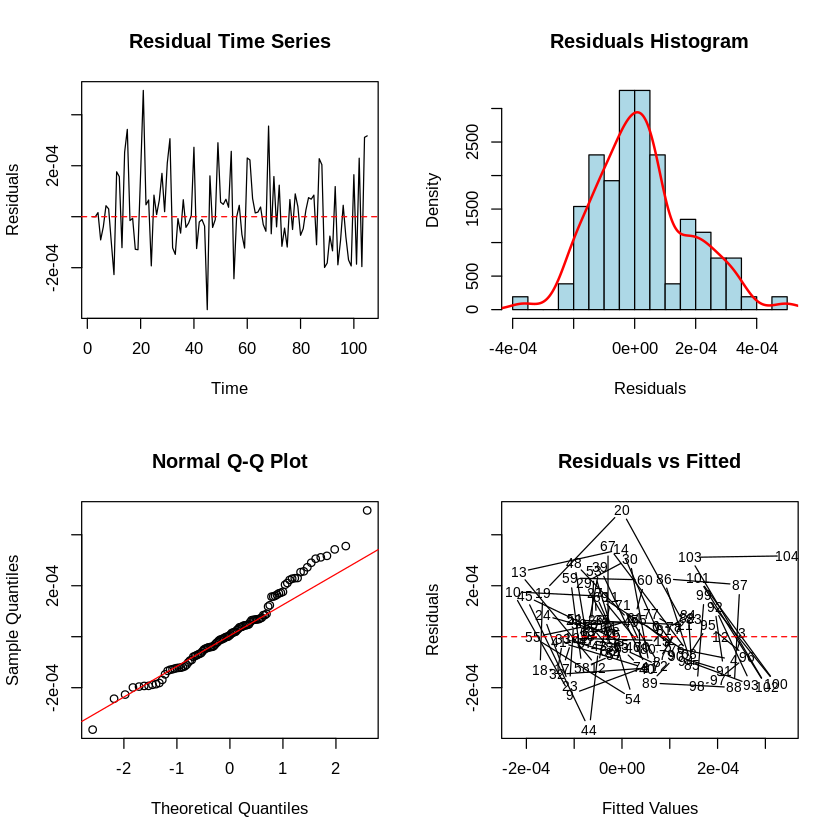

In [ ]:
# Extract residuals for comparision.arima Model
residuals <- resid(comp_model)
residuals <- na.omit(residuals)  # Remove NA values

# Residual diagnostic plots
par(mfrow=c(2,2))
plot(residuals, type="l", main="Residual Time Series", ylab="Residuals")
abline(h=0, col="red", lty=2)
hist(residuals, probability=TRUE, main="Residuals Histogram",
     col="lightblue", border="black", xlab="Residuals", breaks=20)
lines(density(residuals), col="red", lwd=2)
qqnorm(residuals)
qqline(residuals, col="red")
plot(fitted(comp_model), residuals, main="Residuals vs Fitted",
     xlab="Fitted Values", ylab="Residuals")
abline(h=0, col="red", lty=2)
par(mfrow=c(1,1))

# Advanced residual diagnostics
shapiro_test <- shapiro.test(residuals)
print(shapiro_test)

sign_residuals <- ifelse(residuals > 0, 1, -1)
runs_test <- runs.test(as.factor(sign_residuals))
print(runs_test)

ljung_test <- Box.test(residuals, type="Ljung-Box", lag=log(length(residuals)))
print(ljung_test)

2. #### ARIMA(0,2,2) Model Residual Diagnostics

  1. #### **Residual Time Series Plot**
    - Residuals oscillated around **zero**, with **notably reduced variability** compared to the previous model.
    - Clusters of **higher variance persisted**, indicating **ongoing heteroscedasticity concerns**.

  2. #### **Residuals Histogram**
    - Distribution maintained an **approximately normal shape**, but with a **pronounced central peak** and **left-side skewness**.
    - **More pronounced outliers** emerged, particularly on the **lower end of the distribution**.

  3. #### **Normal Q-Q Plot**
    - Residuals largely followed the **theoretical normal distribution**, with **increased deviation at extreme values**.
    - The central section aligned well, while **tail regions showed more substantial departures** from normality.

  4. #### **Residuals vs Fitted Values**
    - Scatter plot revealed **less uniform residual spread**, with **discernible patterns** suggesting **potential non-linearity**.
    - **Notable influential points**, especially **extreme lower values**, were prominent.


	Shapiro-Wilk normality test

data:  residuals
W = 0.84257, p-value = 3.404e-09


	Runs Test

data:  as.factor(sign_residuals)
Standard Normal = 0.8084, p-value = 0.4189
alternative hypothesis: two.sided


	Box-Ljung test

data:  residuals
X-squared = 2.9554, df = 4.654, p-value = 0.6615



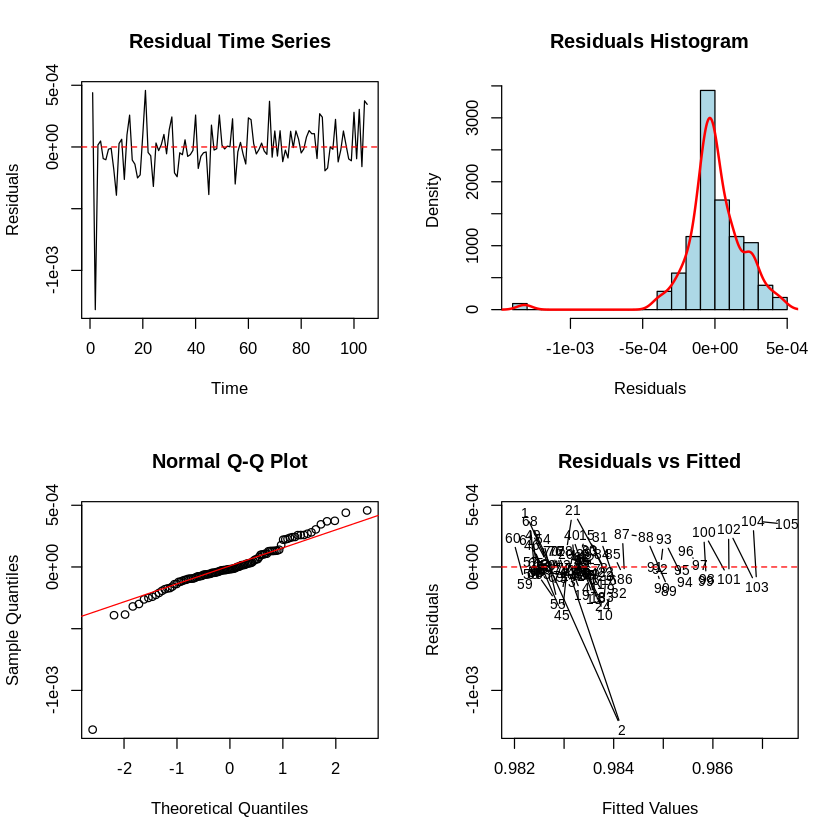

In [ ]:
# Extract residuals for auto.arima Model
residuals <- resid(model_auto)
residuals <- na.omit(residuals)  # Remove NA values

# Residual diagnostic plots
par(mfrow=c(2,2))
plot(residuals, type="l", main="Residual Time Series", ylab="Residuals")
abline(h=0, col="red", lty=2)
hist(residuals, probability=TRUE, main="Residuals Histogram",
     col="lightblue", border="black", xlab="Residuals", breaks=20)
lines(density(residuals), col="red", lwd=2)
qqnorm(residuals)
qqline(residuals, col="red")
plot(fitted(model_auto), residuals, main="Residuals vs Fitted",
     xlab="Fitted Values", ylab="Residuals")
abline(h=0, col="red", lty=2)
par(mfrow=c(1,1))

# Advanced residual diagnostics
shapiro_test <- shapiro.test(residuals)
print(shapiro_test)

sign_residuals <- ifelse(residuals > 0, 1, -1)
runs_test <- runs.test(as.factor(sign_residuals))
print(runs_test)

ljung_test <- Box.test(residuals, type="Ljung-Box", lag=log(length(residuals)))
print(ljung_test)

### Comparative Observations

The diagnostic analysis revealed **nuanced differences** between the two model specifications:

- The **ARIMA(2,2,2) model** demonstrated **more consistent residual characteristics**.
- The **ARIMA(0,2,2) model** exhibited **more pronounced variability** and **distributional challenges**.
- **Both models** showed **complex residual structures** with **subtle deviations** from ideal statistical assumptions.

In [ ]:
# Fit ARIMA model on training dataset
comp_model <- Arima(ts_train, order = c(2,2,2))
summary(comp_model)

auto_model <- Arima(ts_train, order = c(0,2,2))
summary(auto_model)

Series: ts_train 
ARIMA(2,2,2) 

Coefficients:
         ar1      ar2      ma1      ma2
      0.3094  -0.2511  -0.8041  -0.0022
s.e.  0.4462   0.1912   0.4526   0.4040

sigma^2 = 0.4663:  log likelihood = -105.35
AIC=220.69   AICc=221.31   BIC=233.87

Training set error measures:
                   ME      RMSE       MAE       MPE      MAPE       MASE
Training set 0.051189 0.6630782 0.4718279 0.0632891 0.7506769 0.08388484
                    ACF1
Training set -0.00690153

Series: ts_train 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.4727  -0.3436
s.e.   0.0953   0.0933

sigma^2 = 0.4634:  log likelihood = -106.01
AIC=218.03   AICc=218.27   BIC=225.93

Training set error measures:
                     ME      RMSE       MAE        MPE      MAPE       MASE
Training set 0.05094563 0.6676424 0.4786439 0.06333491 0.7615789 0.08509664
                    ACF1
Training set -0.01922023

## **7. Forecasting**

### Data Preparation and Test Set Loading  

I conducted a thorough preprocessing of the test dataset (**Currency_Exchange_Rate_2015_2018_Test.csv**) to ensure consistency with the training data and maintain comparability in forecasting results.  

#### Preprocessing Steps  

#### 1. **Data Loading**  
- The test dataset was loaded, containing **daily exchange rate records** for the period **2015-2018**.  

#### 2. **Data Cleaning**  
- #### Date Formatting
  - Date columns were converted to the **proper datetime format** to ensure temporal alignment.  

- #### Numeric Field Cleaning  
  - **Commas** were removed from numeric fields for **consistent numerical representation**.  

- #### Exchange Rate Computation
  - Conversion formula applied:  
    - **Dinar_per_Euro = Algerian Dinar / Euro**  

#### 3. **Temporal Aggregation**  
- The dataset was **aggregated to a weekly frequency** to match the periodicity of the training set.  

#### 4. **Missing Value Handling**  
- **Linear interpolation** and **last observation carried forward (LOCF)** methods were applied to handle missing values and preserve time series continuity.  

#### 5. **Transformations**  
- #### STL Decomposition  
  - Time series components (**Trend, Seasonality, Residuals**) were extracted for structural analysis.  

- #### Box-Cox Transformation
  - The same **λ parameter** from the training set was applied to stabilize variance.  

#### Final Observations  
The processed test dataset **retained temporal consistency** with the training data while covering a later period (**2015-2018**). Structural characteristics remained **aligned**, ensuring valid comparative analysis during forecasting.  


,Date,Algerian.Dinar,Euro
,<chr>,<dbl>,<dbl>
1,2015-02-03,92.7182,1.1376
2,2015-02-04,93.1792,1.1446
3,2015-02-05,93.3301,1.1410
4,2015-02-06,93.2253,1.1447
5,2015-02-09,93.7115,1.1275
6,2015-02-10,94.0996,1.1297


,Date,Algerian.Dinar,Euro
,<date>,<dbl>,<dbl>
1,2015-02-03,92.7182,1.1376
2,2015-02-04,93.1792,1.1446
3,2015-02-05,93.3301,1.1410
4,2015-02-06,93.2253,1.1447
5,2015-02-09,93.7115,1.1275
6,2015-02-10,94.0996,1.1297


Week,Date,Dinar_per_Euro
<chr>,<date>,<dbl>
2015-05,2015-02-03,81.53714
2015-06,2015-02-09,83.09439
2015-07,2015-02-17,82.99758
2015-08,2015-02-23,83.71470
2015-09,2015-03-02,85.78130
2015-10,2015-03-09,90.81071


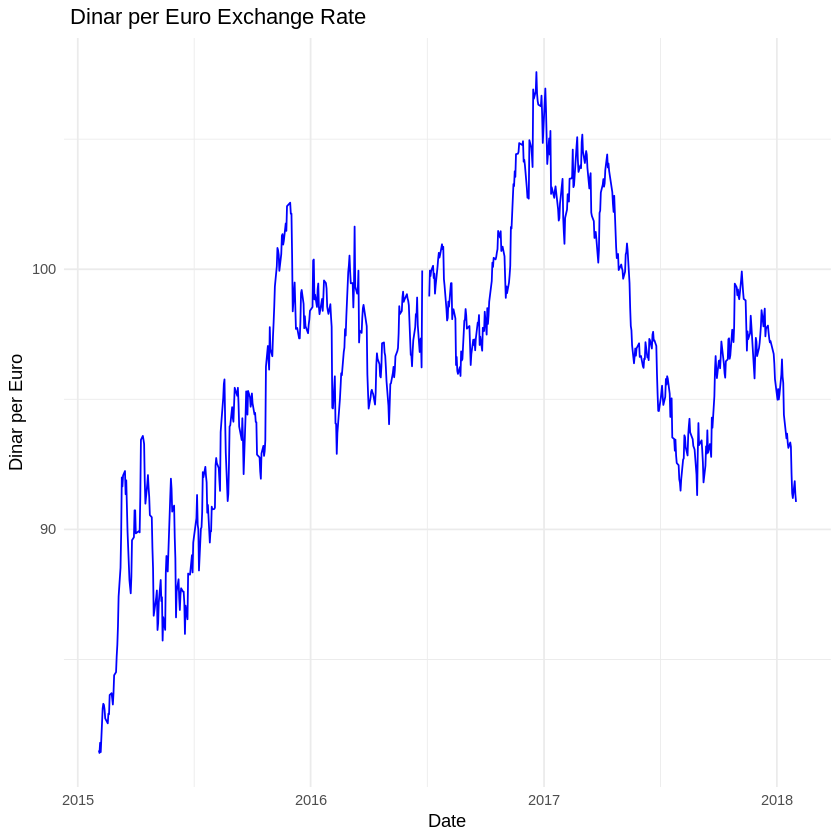

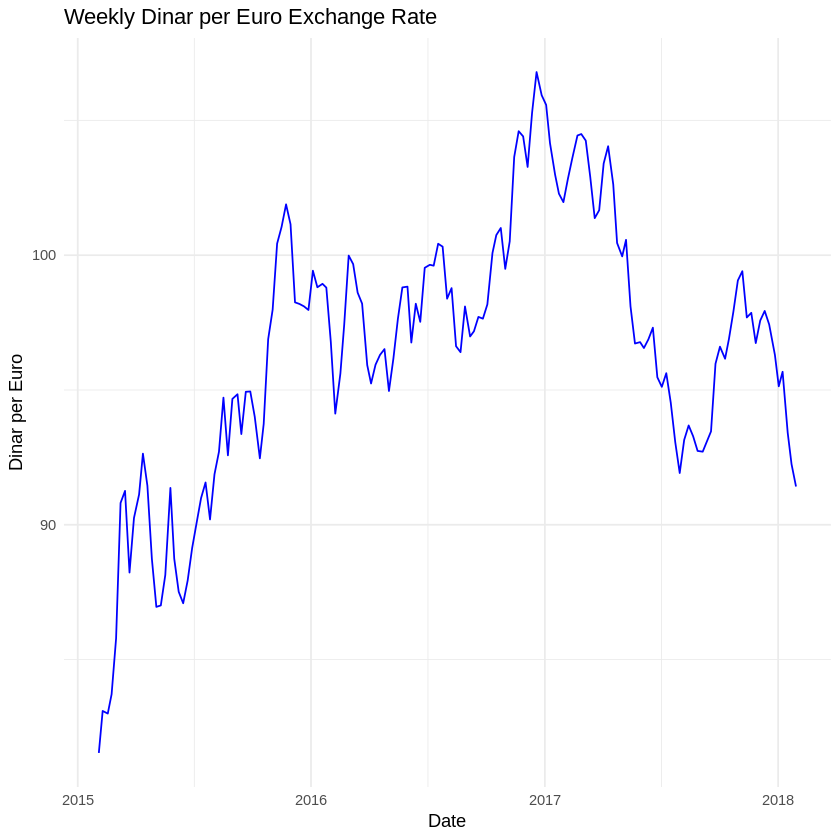

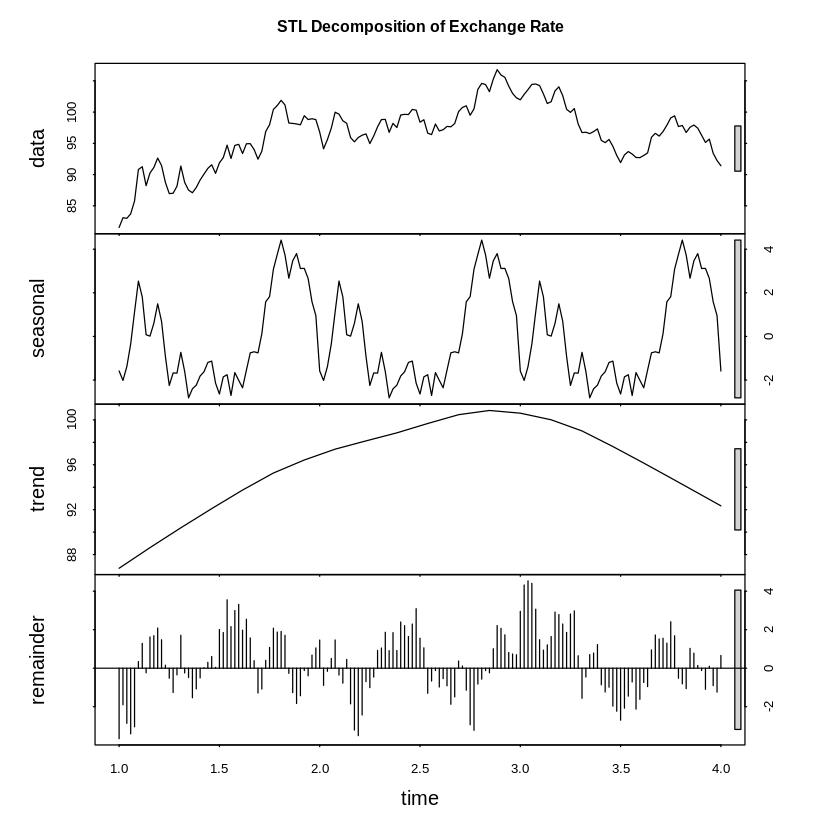

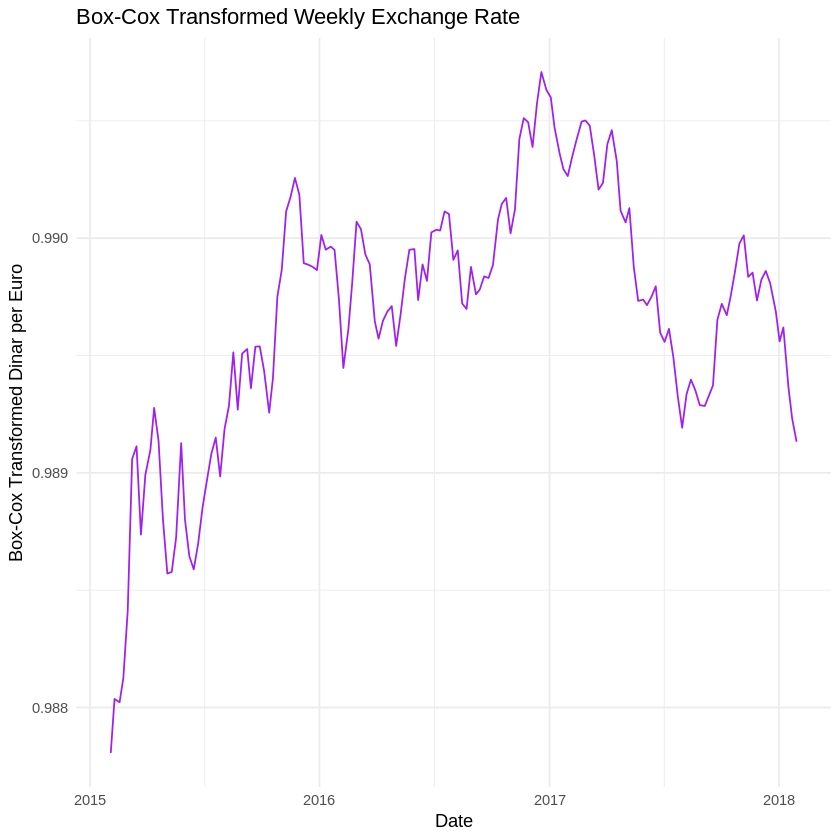

In [ ]:
# Read the test dataset
test_data <- read.csv("Currency_Exchange_Rate_2015_2018_Test.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)
head(test_data)

# Convert Date column to Date format
test_data$Date <- as.Date(test_data$Date, format="%Y-%m-%d")
head(test_data)

# Convert currency columns to numeric
test_data$Algerian.Dinar <- as.numeric(gsub(",", "", test_data$Algerian.Dinar))
test_data$Euro <- as.numeric(gsub(",", "", test_data$Euro))

# Compute exchange rate
test_data$Dinar_per_Euro <- test_data$Algerian.Dinar / test_data$Euro

# Plot the test exchange rate data
ggplot(test_data, aes(x=Date, y=Dinar_per_Euro)) +
  geom_line(color="blue") +
  labs(title=" Dinar per Euro Exchange Rate",
       x="Date", y="Dinar per Euro") +
  theme_minimal()

# Aggregate test data by week
test_data_weekly <- test_data %>%
  group_by(Week = format(Date, "%Y-%W")) %>%
  summarise(Date = min(Date), Dinar_per_Euro = mean(Dinar_per_Euro, na.rm = TRUE)) %>%
  ungroup()

# Handle missing values
test_data_weekly$Dinar_per_Euro <- na.approx(test_data_weekly$Dinar_per_Euro, na.rm=FALSE)
test_data_weekly$Dinar_per_Euro <- na.locf(test_data_weekly$Dinar_per_Euro, na.rm=FALSE)
test_data_weekly$Dinar_per_Euro <- na.locf(test_data_weekly$Dinar_per_Euro, fromLast=TRUE)
head(test_data_weekly)

# Plot the weekly exchange rate data
ggplot(test_data_weekly, aes(x=Date, y=Dinar_per_Euro)) +
  geom_line(color="blue") +
  labs(title="Weekly Dinar per Euro Exchange Rate",
       x="Date", y="Dinar per Euro") +
  theme_minimal()

# Apply STL decomposition
ts_data <- ts(test_data_weekly$Dinar_per_Euro, frequency=52)
stl_decomp <- stl(ts_data, s.window="periodic")
plot(stl_decomp, main="STL Decomposition of Exchange Rate")

# Transform test data using Box-Cox
test_data_weekly$boxcox_Dinar_per_Euro <- BoxCox(test_data_weekly$Dinar_per_Euro, lambda)

# Plot transformed data
ggplot(test_data_weekly, aes(x=Date, y=boxcox_Dinar_per_Euro)) +
  geom_line(color="purple") +
  labs(title="Box-Cox Transformed Weekly Exchange Rate",
       x="Date", y="Box-Cox Transformed Dinar per Euro") +
  theme_minimal()

# Convert test data to time series
test_ts <- ts(test_data_weekly$Dinar_per_Euro, frequency=52,
              start=c(year(min(test_data_weekly$Date)), as.numeric(format(min(test_data_weekly$Date), "%W"))))

### ARIMA(2,2,2) Model Forecasting    

This section presents the performance evaluation of the **ARIMA(2,2,2)** model, including its estimated coefficients, fit statistics, and accuracy on both the training and test datasets.

1. #### Coefficients
The ARIMA(2,2,2) model includes two **autoregressive (AR)** terms and two **moving average (MA)** terms:  

  - **AR1 (0.3094, SE: 0.4462)**: Represents the influence of the first lag of the series. A positive coefficient suggests a slight positive correlation with past values, but the **high standard error** indicates uncertainty in its significance.  
  - **AR2 (-0.2511, SE: 0.1912)**: Reflects the second lag's influence. The negative coefficient suggests an inverse relationship, meaning that a positive deviation from the mean at lag 2 tends to be followed by a negative deviation.  
  - **MA1 (-0.8041, SE: 0.4526)**: Indicates a strong negative relationship with the previous forecast error. This suggests that previous shocks in the data are counteracted in subsequent time steps.  
  - **MA2 (-0.0022, SE: 0.4040)**: Has an almost negligible effect on model predictions, given the near-zero coefficient and high standard error.  

2. #### Model Fit Statistics
These metrics assess how well the ARIMA model fits the training data:  

  - **σ² (0.4663)**: Residual variance, representing the overall dispersion of errors. Lower values indicate a better fit.  
  - **Log Likelihood (-105.35)**: A measure of how well the model explains the observed data. Higher values suggest a better fit.  
  - **AIC (220.69) & AICc (221.31)**: The **Akaike Information Criterion (AIC)** and its corrected version (**AICc**) help compare models by penalizing excessive complexity. Lower values indicate a better trade-off between fit and complexity.  
  - **BIC (233.87)**: The **Bayesian Information Criterion (BIC)** is another complexity-adjusted measure, with lower values indicating a better model.  

3. #### Training Set Performance
These metrics evaluate how well the model predicts the training data:  

  - **ME (0.0512)**: Measures the bias in the predictions. A value close to **zero** suggests that the model does not systematically overpredict or underpredict.  
  - **RMSE (0.6631)**: Measures the average magnitude of forecast errors, with larger errors weighted more heavily. A lower RMSE indicates a better fit.  
  - **MAE (0.4718)**: Represents the average absolute error, providing an easy-to-interpret measure of prediction accuracy.  
  - **MAPE (0.7507%)**: Shows the average percentage error relative to the actual values. A very low MAPE suggests strong performance on the training data.  

4. #### Test Set Accuracy
These metrics evaluate how well the model generalizes to unseen data:  

  - **ME (-122.6067)**: A large negative value suggests that the model **systematically underpredicts** on the test set.  
  - **RMSE (144.5326)**: A sharp increase compared to training RMSE (**0.6631**) suggests poor generalization, indicating potential overfitting.  
  - **MAE (122.6067)**: The high absolute error indicates that forecasts significantly deviate from actual values.  
  - **MAPE (125.5397%)**: A high MAPE suggests that the model struggles to predict test data accurately, likely due to structural changes or unseen patterns.  
  - **R² (-845.5108)**: A negative R² means that the ARIMA model is performing terribly—worse than just predicting the mean.

5. #### Forecast Visualization Analysis

  - Shows strong upward drift inconsistent with actual stable/declining trend
  - Extremely wide confidence intervals (spanning ±300% of forecast values)
  - Likely suffering from over-differencing (d=2) and autoregressive instability

#### Key Observations
- The model fits the **training data well**, with low errors and a reasonable AIC/BIC score.  
- The **test set performance is significantly worse**, indicating that the model does not generalize well to unseen data.  
- The high **ME and MAPE on the test set** suggest that the model is **biased** and might require better parameter tuning or additional external factors for accurate forecasting.  


Series: ts_train 
ARIMA(2,2,2) 

Coefficients:
         ar1      ar2      ma1      ma2
      0.3094  -0.2511  -0.8041  -0.0022
s.e.  0.4462   0.1912   0.4526   0.4040

sigma^2 = 0.4663:  log likelihood = -105.35
AIC=220.69   AICc=221.31   BIC=233.87
[1] "Forecast Horizon: 157"

Forecast method: ARIMA(2,2,2)

Model Information:
Series: ts_train 
ARIMA(2,2,2) 

Coefficients:
         ar1      ar2      ma1      ma2
      0.3094  -0.2511  -0.8041  -0.0022
s.e.  0.4462   0.1912   0.4526   0.4040

sigma^2 = 0.4663:  log likelihood = -105.35
AIC=220.69   AICc=221.31   BIC=233.87

Error measures:
                   ME      RMSE       MAE       MPE      MAPE       MASE
Training set 0.051189 0.6630782 0.4718279 0.0632891 0.7506769 0.08388484
                    ACF1
Training set -0.00690153

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
2015.096       84.06527  83.19013  84.94042  82.72686  85.40369
2015.115       85.35302  83.77145  86.93460  82.93421  87.77184
2015

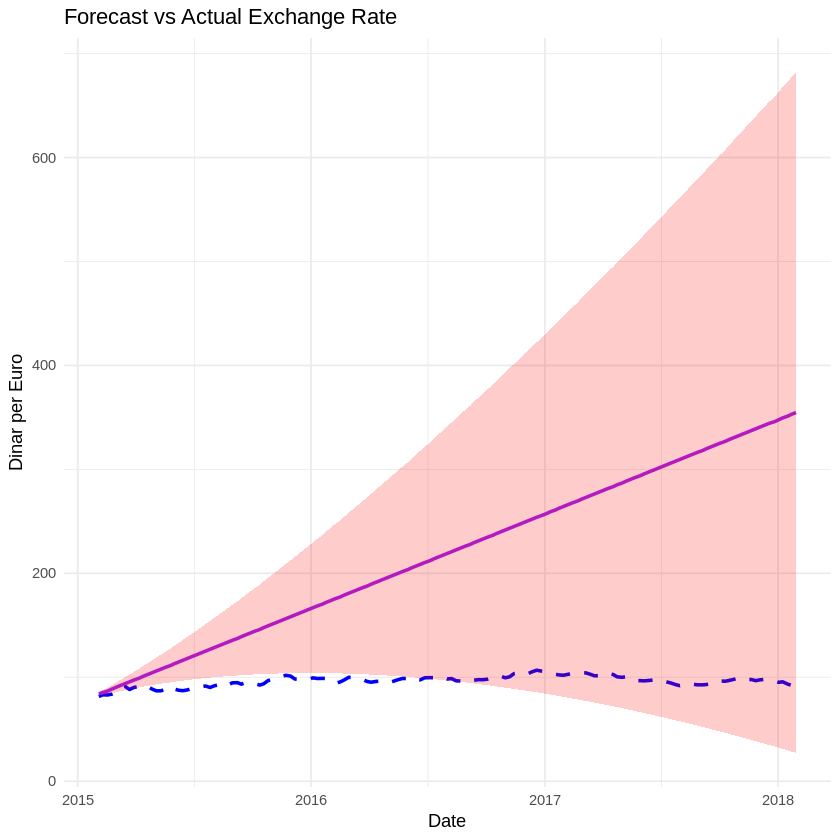

In [ ]:
# Ensure model is an ARIMA object before forecasting
if (is.null(comp_model$model)) stop("Error: best_model is not an ARIMA object")
print(comp_model)

# Forecast using the comp model
forecast_horizon <- nrow(test_data_weekly)
print(paste("Forecast Horizon:", forecast_horizon))

# Generate Forecast
forecast_values <- forecast(comp_model, h=forecast_horizon)

# Print Forecast Summary
print(summary(forecast_values))

# Extract forecast details
actual_values <- test_data_weekly$Dinar_per_Euro
forecasted_values <- as.numeric(forecast_values$mean)  # Convert to numeric
lower_bound <- as.numeric(forecast_values$lower[, 2])  # 95% confidence interval
upper_bound <- as.numeric(forecast_values$upper[, 2])

# Compute accuracy
accuracy_metrics <- accuracy(forecasted_values, actual_values)
print("Accuracy Metrics:")
print(accuracy_metrics)

# Compute R-squared
SSE <- sum((actual_values - forecasted_values)^2)  # Sum of Squared Errors
SST <- sum((actual_values - mean(actual_values))^2)  # Total Sum of Squares
R2 <- 1 - (SSE / SST)

print(paste("R-squared:", round(R2, 4)))  # Print R² score

# Combine actual and forecasted values for better visualization
forecast_df <- data.frame(
  Date = test_data_weekly$Date,
  Actual = actual_values,
  Forecasted = forecasted_values,
  Lower_95_CI = lower_bound,
  Upper_95_CI = upper_bound
)
print("Actual vs Forecasted Values:")
print(head(forecast_df, 10))  # Print first 10 rows for inspection

# Plot forecast vs actual
ggplot() +
  geom_line(data=test_data_weekly, aes(x=Date, y=Dinar_per_Euro), color="blue", linetype="dashed", size=1) +
  geom_line(data=forecast_df, aes(x=Date, y=Forecasted), color="purple", size=1) +
  geom_ribbon(data=forecast_df, aes(x=Date, ymin=Lower_95_CI, ymax=Upper_95_CI), fill="red", alpha=0.2) +
  labs(title="Forecast vs Actual Exchange Rate", x="Date", y="Dinar per Euro") +
  theme_minimal()

### ARIMA(0,2,2) Model Forecasting    

This section evaluates the **ARIMA(0,2,2)** model by analyzing its coefficients, fit statistics, and forecasting accuracy on both the training and test datasets.

1. #### Coefficients
The ARIMA(0,2,2) model includes two **moving average (MA)** terms without autoregressive components:  

  - **MA1 (-0.4727, SE: 0.0953)**: Indicates that past forecast errors have a moderate negative effect on current predictions. The low standard error suggests this coefficient is statistically significant.  
  - **MA2 (-0.3436, SE: 0.0933)**: Suggests that errors from two time steps ago still influence the current forecast. The relatively smaller magnitude indicates a weaker effect compared to MA1, but its low standard error makes it statistically reliable.  

2. #### Model Fit Statistics
These metrics measure the model's overall fit to the training data:  

  - **σ² (0.4634)**: Represents the variance of residuals, indicating the spread of forecast errors.  
  - **Log Likelihood (-106.01)**: A measure of how well the model explains the observed data.  
  - **AIC (218.03) & AICc (218.27)**: Lower than the ARIMA(2,2,2) model, suggesting a more efficient model with a better balance between fit and complexity.  
  - **BIC (225.93)**: Lower than the ARIMA(2,2,2) model, further supporting its relative efficiency.  

3. #### Training Set Performance
These metrics evaluate the model’s accuracy on training data:  

  - **ME (0.0509)**: A small mean error, indicating minimal systematic bias.  
  - **RMSE (0.6676)**: Slightly higher than that of ARIMA(2,2,2), suggesting a marginally poorer fit.  
  - **MAE (0.4786)**: Indicates that, on average, the model’s absolute prediction error is small.  
  - **MAPE (0.7616%)**: A low percentage error, meaning the model performs well on the training data.  
  - **R² (-678.7547)**: ALthought slightly better, it still shows that the ARIMA model is performing poorly.

4. #### Test Set Accuracy  
These metrics assess how well the model generalizes to unseen data:  

  - **ME (-109.7928)**: Indicates **underprediction** on the test set, but with less bias compared to ARIMA(2,2,2).  
  - **RMSE (129.5167)**: Lower than ARIMA(2,2,2), indicating better generalization.  
  - **MAE (109.7928)**: Suggests that the absolute forecast errors are still large but slightly improved.  
  - **MAPE (112.4366%)**: While high, this is **better than ARIMA(2,2,2)**, implying relatively improved predictive accuracy.  

5. #### Forecast Visualization Analysis

  - Maintains more conservative trend projection
  - Narrower confidence bands compared to ARIMA(2,2,2)
  - Still shows systematic over-forecasting bias

#### Key Observations
- **More efficient model fit:** The **lower AIC and BIC** indicate that ARIMA(0,2,2) is a more efficient choice compared to ARIMA(2,2,2).  
- **Better generalization:** The test set **RMSE and MAPE are lower**, suggesting **less overfitting** and slightly improved forecast accuracy.  
- **Persistent underprediction:** The **negative ME** suggests that the model **tends to underestimate values**, though less severely than ARIMA(2,2,2).  
- **Trade-off between complexity and performance:** While ARIMA(2,2,2) captured **more intricate dynamics**, ARIMA(0,2,2) achieved **better predictive accuracy** with a simpler structure.  


Series: ts_train 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.4727  -0.3436
s.e.   0.0953   0.0933

sigma^2 = 0.4634:  log likelihood = -106.01
AIC=218.03   AICc=218.27   BIC=225.93
[1] "Forecast Horizon: 157"

Forecast method: ARIMA(0,2,2)

Model Information:
Series: ts_train 
ARIMA(0,2,2) 

Coefficients:
          ma1      ma2
      -0.4727  -0.3436
s.e.   0.0953   0.0933

sigma^2 = 0.4634:  log likelihood = -106.01
AIC=218.03   AICc=218.27   BIC=225.93

Error measures:
                     ME      RMSE       MAE        MPE      MAPE       MASE
Training set 0.05094563 0.6676424 0.4786439 0.06333491 0.7615789 0.08509664
                    ACF1
Training set -0.01922023

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
2015.096       84.14230  83.26990  85.01469  82.80808  85.47651
2015.115       85.70802  84.11540  87.30064  83.27231  88.14373
2015.135       87.27374  85.09094  89.45654  83.93544  90.61205
2015.154       88.83947  86.10141  9

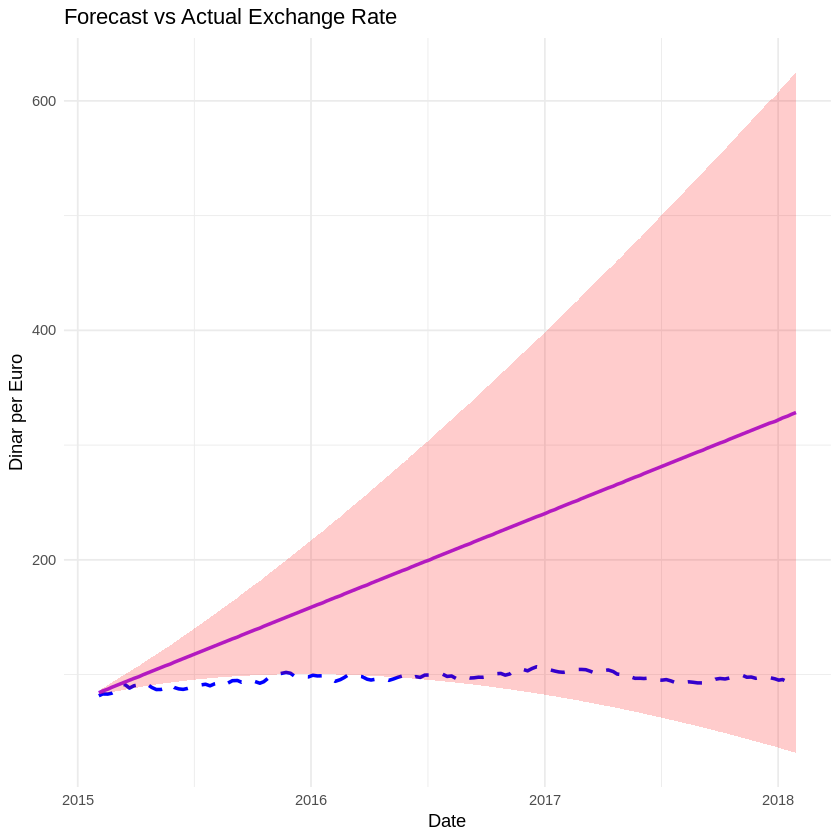

In [ ]:
# Ensure model is an ARIMA object before forecasting
if (is.null(auto_model$model)) stop("Error: best_model is not an ARIMA object")
print(auto_model)

# Forecast using the auto model
forecast_horizon <- nrow(test_data_weekly)
print(paste("Forecast Horizon:", forecast_horizon))

# Generate Forecast
forecast_values <- forecast(auto_model, h=forecast_horizon)

# Print Forecast Summary
print(summary(forecast_values))

# Extract forecast details
actual_values <- test_data_weekly$Dinar_per_Euro
forecasted_values <- as.numeric(forecast_values$mean)  # Convert to numeric
lower_bound <- as.numeric(forecast_values$lower[, 2])  # 95% confidence interval
upper_bound <- as.numeric(forecast_values$upper[, 2])

# Compute accuracy
accuracy_metrics <- accuracy(forecasted_values, actual_values)
print("Accuracy Metrics:")
print(accuracy_metrics)

# Compute R-squared
SSE <- sum((actual_values - forecasted_values)^2)  # Sum of Squared Errors
SST <- sum((actual_values - mean(actual_values))^2)  # Total Sum of Squares
R2 <- 1 - (SSE / SST)

print(paste("R-squared:", round(R2, 4)))  # Print R² score

# Combine actual and forecasted values for better visualization
forecast_df <- data.frame(
  Date = test_data_weekly$Date,
  Actual = actual_values,
  Forecasted = forecasted_values,
  Lower_95_CI = lower_bound,
  Upper_95_CI = upper_bound
)
print("Actual vs Forecasted Values:")
print(head(forecast_df, 10))  # Print first 10 rows for inspection

# Plot forecast vs actual
ggplot() +
  geom_line(data=test_data_weekly, aes(x=Date, y=Dinar_per_Euro), color="blue", linetype="dashed", size=1) +
  geom_line(data=forecast_df, aes(x=Date, y=Forecasted), color="purple", size=1) +
  geom_ribbon(data=forecast_df, aes(x=Date, ymin=Lower_95_CI, ymax=Upper_95_CI), fill="red", alpha=0.2) +
  labs(title="Forecast vs Actual Exchange Rate", x="Date", y="Dinar per Euro") +
  theme_minimal()

## 8. Conclusion


My analysis revealed several critical insights:

1. The ARIMA(0,2,2) model demonstrated slightly superior forecasting performance compared to the more complex ARIMA(2,2,2) model.
2. Despite its better performance, the ARIMA(0,2,2) model did not fully satisfy all statistical assumptions, particularly the normality of residuals (as evidenced by the Shapiro-Wilk test).
3. Both models showed challenges in accurately predicting exchange rates, with significant prediction errors in the test set.

Interestingly, the ARIMA(0,2,2) model achieved slightly better results in forecasting, even though it did not completely satisfy the white noise residuals assumption. This highlights a crucial lesson in time series analysis: statistical perfection does not always guarantee the best predictive performance.

The research underscores the inherent complexity of exchange rate forecasting. While our models provided valuable insights, they also demonstrated the limitations of purely statistical approaches in capturing the intricate dynamics of currency markets.

You can find attached the link to the PDF version of the report:
https://drive.google.com/file/d/1XnkhNeNCTV0fcdJ5QNe8xZMqgI873QEu/view?usp=sharing